<a href="https://colab.research.google.com/github/sitialfiyyatuz28/project_Uas_ML_kelompok2/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
data = pd.read_csv("KPR_house_purchase_data_example.csv")
data.head(5)

,User ID,Gender,Age,income,Purchased
0,1,Male,21,8000000,0
1,2,Male,37,2500000,1
2,3,Male,40,2600000,1
3,4,Male,36,2800000,1
4,5,Female,38,2900000,1


In [ ]:
data.drop("User ID", axis=1 ,inplace=True)
data

,Gender,Age,income,Purchased
0,Male,21,8000000,0
1,Male,37,2500000,1
2,Male,40,2600000,1
3,Male,36,2800000,1
4,Female,38,2900000,1
5,Male,35,2200000,1
6,Female,37,4900000,1
7,Male,38,4100000,1
8,Female,35,2200000,1
9,Male,36,2300000,1


In [ ]:
sex = pd.get_dummies(data["Gender"], drop_first=True)
sex

,Male
0,True
1,True
2,True
3,True
4,False
5,True
6,False
7,True
8,False
9,True


In [ ]:
data =pd.concat([data,sex], axis=1)
data

,Gender,Age,income,Purchased,Male
0,Male,21,8000000,0,True
1,Male,37,2500000,1,True
2,Male,40,2600000,1,True
3,Male,36,2800000,1,True
4,Female,38,2900000,1,False
5,Male,35,2200000,1,True
6,Female,37,4900000,1,False
7,Male,38,4100000,1,True
8,Female,35,2200000,1,False
9,Male,36,2300000,1,True


In [ ]:
data.drop("Gender",axis=1 ,inplace=True)
data

,Age,income,Purchased,Male
0,21,8000000,0,True
1,37,2500000,1,True
2,40,2600000,1,True
3,36,2800000,1,True
4,38,2900000,1,False
5,35,2200000,1,True
6,37,4900000,1,False
7,38,4100000,1,True
8,35,2200000,1,False
9,36,2300000,1,True


In [ ]:
x=data.drop("Purchased", axis=1)
y=data["Purchased"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
xdata=data.drop("Purchased", axis=1)
ydata=data["Purchased"]

In [ ]:
xdata

,Age,income,Male
0,21,8000000,True
1,37,2500000,True
2,40,2600000,True
3,36,2800000,True
4,38,2900000,False
5,35,2200000,True
6,37,4900000,False
7,38,4100000,True
8,35,2200000,False
9,36,2300000,True


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1])

In [ ]:
y_test

2     1
22    0
14    0
17    0
5     1
11    1
Name: Purchased, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2, 1],
       [0, 3]])

In [ ]:
from sklearn.metrics import accuracy_score
predic = knn.predict(x_test)
accuracy_score(y_test, predic)

0.8333333333333334

In [ ]:
print(knn.predict(sc.transform([[30,4500000,1]])))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_nb)
cm

array([[3, 0],
       [0, 3]])

In [ ]:
from sklearn.metrics import accuracy_score
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 100.0 %


In [ ]:
print(nb.predict(sc.transform([[20,900,0]])))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 100.0 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [ ]:
x_train

array([[-1.00097537, -0.56344772, -1.        ],
       [-1.3977584 , -0.17908028,  1.        ],
       [ 0.58615675, -0.69157021,  1.        ],
       [-1.00097537, -1.01187641, -1.        ],
       [-1.00097537,  2.831798  , -1.        ],
       [ 0.98293978, -0.75563145,  1.        ],
       [ 0.98293978, -0.91578455,  1.        ],
       [ 0.58615675,  1.90291002,  1.        ],
       [ 0.18937372,  0.07716468, -1.        ],
       [ 0.58615675, -0.85172331, -1.        ],
       [ 0.98293978,  0.01310344, -1.        ],
       [ 1.18133129, -0.62750897, -1.        ],
       [-0.80258386, -0.14704966, -1.        ],
       [-1.00097537,  1.32635886,  1.        ],
       [ 0.78454826, -0.81969269,  1.        ],
       [ 1.18133129, -0.24314152,  1.        ],
       [-1.19936689,  0.7498077 , -1.        ],
       [ 0.78454826, -0.65953959,  1.        ],
       [-2.19132446,  1.00605266,  1.        ],
       [ 0.18937372, -0.65953959, -1.        ],
       [-0.40580083,  0.81386894,  1.   

In [ ]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


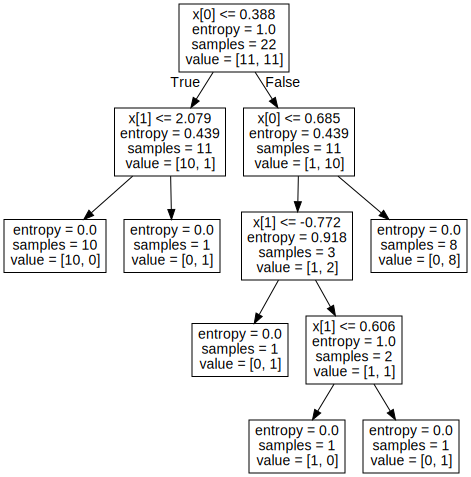

In [ ]:
import graphviz
from sklearn import tree
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(x_train,y_train)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Diabetes")

graph

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [ ]:
print(nb.predict(sc.transform([[30,8000000,0]])))
print(nb.predict(sc.transform([[26,3000000,1]])))
print(nb.predict(sc.transform([[27,8000000,1]])))
print(nb.predict(sc.transform([[27,5500000,0]])))
print(nb.predict(sc.transform([[33,3000000,0]])))
print(nb.predict(sc.transform([[35,8000000,0]])))
print(nb.predict(sc.transform([[21,7500000,1]])))
print(nb.predict(sc.transform([[29,3000000,0]])))

[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 